In [1]:
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
import os
import fiona
from statistics import mean, median
from pandas import read_csv
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw' #To load KML files
import string
import xml.etree.ElementTree as et

pd.options.display.max_columns = 999

# VEST CT 2018

## VEST Documentation

### Sources

#### Election Results
Election results from the Connecticut Secretary of State (https://portal.ct.gov/SOTS/Election-Services/Election-Results/Election-Results).

#### Shapefiles
Precinct shapefile from the U.S. Census Bureau's 2020 Redistricting Data Program.

### Processing
District splits not reported separately were merged for Bethel 5, Bridgeport 129-3, 130-2, Durham 3, East Haven 3-3, Hartford 11, 12, 24, Naugatuck 3-3, New Britain 12, New Haven 9-2, 17, 21-1, Stamford 3, 5, 6-1, 8, 12, 20-1, 21, Torrington 6, 7, Waterbury 74-5.

The Stratford and Westport precincts were renumbered from municipal districts to state/federal districts.

The following additional modifications were made to match the 2018 precinct boundaries.

Ansonia: Adjust 1/2 to match shapefile  
Avon: Adjust 1/3 to match street list  
Berlin: Adjust 2/5 to match voter file  
Bethel: Adjust 1/4 to match voter file  
Bridgeport: Adjust 124-2/3/4, 126-1/2/5, 130-3/4 to match PDF  
Colchester: Adjust 1/3, 2/4 to match street list  
Coventry: Adjust 1/2 to match street list  
Danbury: Align wards 4/5, 6/7 with PDF  
Darien: Align 1/5, 1/6, 2/4 with shapefile  
East Hartford: Adjust 1/2, 5/6 to match street list  
East Haven: Add 1-3, 5-3 to match street list; Align 3, 3-3 with LD  
East Windsor: Align 1, 1-2 with LD  
Enfield: Adjust 258/458 to match PDF  
Fairfield: Split 3-32/3-34 by LD; Adjust 8/9 to match PDF  
Glastonbury: Adjust 4/5, 4/9, 7/9 to match PDF  
Greenwich: Split 10/10-1 by LD; Adjust 1/2/3 to match PDF  
Guilford: Adjust 1/3, 2/3 to match descriptions  
Haddam: Adjust 1/2 to match street list  
Hamden: Adjust 1/9, 5/6 to match PDF  
Killingly: Adjust 2/4, 3/4 to match PDF   
Ledyard: Adjust 1/2 to match street list  
Litchfield: Adjust 2/4 to match voter file  
Manchester: Merge 5/9; Adjust 3/5 to match street list  
Middletown: Adjust 1/12 to match GIS  
Milford: Align 117/119, 119-1/3 with LD and PDF  
New Britain: Adjust 12/14 to match voter file  
New Haven: Split 11-1/11-3 and align VTDs with voter file  
New Milford: Align all VTDs with voter file  
Newtown: Adjust 1/2 to match street list  
Norwich: Adjust 4/5 to match voter file  
Plainfield: Adjust 1/3, 2/4 to match voter file  
Ridgefield: Adjust 1/2, 1/3 to match voter file  
Rocky Hill: Adjust 2/3 to match voter file  
Seymour: Adjust 1/3, 2/3 to match voter file  
Shelton: Adjust 1/4, 2/3 to match PDF, voter file  
Simsbury: Align 1/2 with 2017 redistricting  
South Windsor: Adjust 3/5, 4/5 to match PDF  
Southbury: Align all VTDs with shapefile, street list  
Southington: Adjust 3/6, 5/8, 8/9 to match PDF  
Stafford: Adjust 1/2 to match PDF  
Stamford: Merge 1/23 and adjust 6/7 to reverse 2019 redistricting  
Stonington: Align all VTDs with shapefile  
Stratford: Split 20-1/13, 80-1/21 by LD; Align VTDs with voter file  
Vernon: Adjust 1/2, 2/3 to match PDF  
Wallingford: Adjust 2/3, 2/4, 7/8 to match voter file  
Waterbury: Align VTDs with PDF, street list, voter file  
West Haven: Adjust 1/7, 4/5/6, 8/9/10 to match voter file  
Weston: Adjust 1/2 to match voter file  
Windham: Adjust 4/6 to match street list  
Windsor: Adjust 1/3 to match street list  
Wolcott: Adjust 1/2, 1/3 to match voter file  

### Races
G18USSDMUR - Christopher S. Murphy (Democratic Party and Working Families Party (fusion candidate))  
G18USSRCOR - Matthew Corey (Republican Party)  
G18USSLLIO - Richard Lion (Libertarian Party)  
G18USSGRUS - Jeff Russell (Green Party)  
G18USSOWRI - Write-in Votes  

G18GOVDLAM - Ned Lamont (Democratic Party and Working Families Party (fusion candidate))  
G18GOVRSTE - Bob Stefanowski (Republican Party and Independent Party (fusion candidate))  
G18GOVLHAN - Rodney Hanscomb (Libertarian Party)  
G18GOVOGRI - Oz Griebel (Griebel Frank for CT Party)  
G18GOVOGRE - Mark Stewart Greenstein (Amigo Constitution Liberty Party)  
G18GOVOWRI - Write-in Votes  

G18ATGDTON - William Tong (Democratic Party and Working Families Party (fusion candidate))  
G18ATGRHAT - Sue Hatfield (Republican Party and Independent Party (fusion candidate))  
G18ATGGGOS - Peter D. Goselin (Green Party)  

G18SOSDMER - Denise W. Merrill (Democratic Party and Working Families Party (fusion candidate))
G18SOSRCHA - Susan Chapman (Republican Party and Independent Party (fusion candidate))  
G18SOSLGWY - Heather Lynn Sylvestre Gwynn (Libertarian Party)  
G18SOSGDER - S. Michael DeRosa (Green Party)  

G18TREDWOO - Shawn Wooden (Democratic Party and Working Families Party (fusion candidate))  
G18TRERGRA - Thad Gray (Republican Party and Independent Party (fusion candidate))  
G18TRELBRO - Jesse Brohinsky (Libertarian Party)  
G18TREOWRI - Write-in Votes  

G18COMDLEM - Kevin Lembo (Democratic Party and Working Families Party (fusion candidate))  
G18COMRMIL - Kurt Miller (Republican Party and Independent Party (fusion candidate))  
G18COMLPAS - Paul Passarelli (Libertarian Party)  
G18COMGHEF - Edward G. Heflin (Green Party)  

## Election Result Processing

### Load in VEST file

In [2]:
vest_ct_18 = gp.read_file("./raw-from-source/VEST/ct_2018/ct_2018.shp")

## Create a list of the race columns

In [3]:
data_columns = [i for i in vest_ct_18.columns if "G18" in i]

### Load the Election Results

Note: Some minor formatting was applied to the election results before uploading (deleting one column and deleting additional rows that discussed turnout)

In [4]:
election_results = pd.read_csv("./raw-from-source/Election_Results/ct-2018-statewide-voting-district-report.csv",skiprows=[0,1],index_col=0)

#Clean index
election_results.reset_index(inplace=True,drop=False)

#Filter down to the races we're interested in
office_list = ['Governor and Lieutenant Governor', 'United States Senator','Secretary of the State', 'Treasurer',
       'Comptroller', 'Attorney General']
election_results = election_results[election_results["OfficeName"].isin(office_list)]

#Create a column with the office name and the candidate
election_results["cand_detailed"] = election_results["OfficeName"]+"-"+election_results["CandidateName"]

In [5]:
#Create a dictionary of name changes to match VEST
cand_detailed_change_dict = {      
       'Governor and Lieutenant Governor-Ned Lamont and Susan BysiewiczMachine/Polling Place/EDRAbsenteeTotal':"G18GOVDLAM",
       'Governor and Lieutenant Governor-Bob Stefanowski and Joe MarkleyMachine/Polling Place/EDRAbsenteeTotal':"G18GOVRSTE",
       'Governor and Lieutenant Governor-Rodney Hanscomb and Jeffrey ThibeaultMachine/Polling Place/EDRAbsenteeTotal':"G18GOVLHAN",
       'Governor and Lieutenant Governor-Mark Stewart Greenstein and John DemitrusMachine/Polling Place/EDRAbsenteeTotal':"G18GOVOGRE",
       'Governor and Lieutenant Governor-Oz Griebel and Monte E FrankMachine/Polling Place/EDRAbsenteeTotal':"G18GOVOGRI",
       'Governor and Lieutenant Governor-Lee Whitnum and Jacey WyattMachine/Polling Place/EDRAbsenteeTotal':"G18GOVOWRI",
       'United States Senator-Christopher S MurphyMachine/Polling Place/EDRAbsenteeTotal':"G18USSDMUR",
       'United States Senator-*Matthew CoreyMachine/Polling Place/EDRAbsenteeTotal':"G18USSRCOR",
       'United States Senator-Richard LionMachine/Polling Place/EDRAbsenteeTotal':"G18USSLLIO",
       'United States Senator-Jeff RussellMachine/Polling Place/EDRAbsenteeTotal':"G18USSGRUS",
       'United States Senator-Kristi L TalmadgeMachine/Polling Place/EDRAbsenteeTotal':"G18USSOWRI",
       'United States Senator-Fred LinckMachine/Polling Place/EDRAbsenteeTotal':"G18USSOWRI",
       'Secretary of the State-Denise W MerrillMachine/Polling Place/EDRAbsenteeTotal':"G18SOSDMER",
       'Secretary of the State-Susan ChapmanMachine/Polling Place/EDRAbsenteeTotal':"G18SOSRCHA",
       'Secretary of the State-Heather Lynn Sylvestre GwynnMachine/Polling Place/EDRAbsenteeTotal':"G18SOSLGWY",
       'Secretary of the State-S Michael DeRosaMachine/Polling Place/EDRAbsenteeTotal':"G18SOSGDER",
       'Treasurer-*Shawn WoodenMachine/Polling Place/EDRAbsenteeTotal':"G18TREDWOO",
       'Treasurer-*Thad GrayMachine/Polling Place/EDRAbsenteeTotal':"G18TRERGRA",
       'Treasurer-Shawn WoodenMachine/Polling Place/EDRAbsenteeTotal':"G18TREDWOO",
       'Treasurer-Thad GrayMachine/Polling Place/EDRAbsenteeTotal':"G18TRERGRA",
       'Treasurer-Jesse BrohinskyMachine/Polling Place/EDRAbsenteeTotal':"G18TRELBRO",
       'Treasurer-W. Michael DownesMachine/Polling Place/EDRAbsenteeTotal':"G18TREOWRI",
       'Comptroller-Kevin LemboMachine/Polling Place/EDRAbsenteeTotal':"G18COMDLEM",
       'Comptroller-*Kurt MillerMachine/Polling Place/EDRAbsenteeTotal':"G18COMRMIL",
       'Comptroller-Kurt MillerMachine/Polling Place/EDRAbsenteeTotal':"G18COMRMIL",
       'Comptroller-Paul PassarelliMachine/Polling Place/EDRAbsenteeTotal':"G18COMLPAS",
       'Comptroller-Edward G HeflinMachine/Polling Place/EDRAbsenteeTotal':"G18COMGHEF",
       'Attorney General-*William TongMachine/Polling Place/EDRAbsenteeTotal':"G18ATGDTON",
       'Attorney General-*Sue HatfieldMachine/Polling Place/EDRAbsenteeTotal':"G18ATGRHAT",
       'Attorney General-William TongMachine/Polling Place/EDRAbsenteeTotal':"G18ATGDTON",
       'Attorney General-Sue HatfieldMachine/Polling Place/EDRAbsenteeTotal':"G18ATGRHAT",
       'Attorney General-Peter D GoselinMachine/Polling Place/EDRAbsenteeTotal':"G18ATGGGOS"
}

#Apply the name changes
election_results["cand_detailed"] = election_results["cand_detailed"].map(cand_detailed_change_dict).fillna(election_results["cand_detailed"])

In [6]:
#Perform the pivot
pivoted_results = pd.pivot_table(election_results,index=["Polling_Place_Name","TownName"],values=["Final_Count"],aggfunc=sum,columns="cand_detailed")

#Clean the pivoted data
pivoted_results.reset_index(inplace=True,drop=False)
pivoted_results.columns = pivoted_results.columns.droplevel(0)
pivoted_results.columns = ['Precinct', 'Town'  , 'G18ATGDTON', 'G18ATGGGOS', 'G18ATGRHAT', 'G18COMDLEM',
       'G18COMGHEF', 'G18COMLPAS', 'G18COMRMIL', 'G18GOVDLAM', 'G18GOVLHAN',
       'G18GOVOGRE', 'G18GOVOGRI', 'G18GOVOWRI', 'G18GOVRSTE', 'G18SOSDMER',
       'G18SOSGDER', 'G18SOSLGWY', 'G18SOSRCHA', 'G18TREDWOO', 'G18TRELBRO',
       'G18TREOWRI', 'G18TRERGRA', 'G18USSDMUR', 'G18USSGRUS', 'G18USSLLIO',
       'G18USSOWRI', 'G18USSRCOR']
pivoted_results = pivoted_results.fillna(0)

## Statewide Totals Check

In [7]:
def statewide_totals_check(partner_df,source_df,column_list):
    """Compares the totals of two election result dataframes at the statewide total level

    Args:
      partner_df: DataFrame of election results we are comparing against
      source_df: DataFrame of election results we are comparing to
      column_list: List of races that there are votes for
 
    Returns:
      Nothing, only prints out an analysis
    """
    print("***Statewide Totals Check***")
    for race in column_list:
        if (partner_df[race].sum()- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(partner_df[race].sum()-source_df[race].sum())+" votes")
            print("\tVEST: "+str(partner_df[race].sum())+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(partner_df[race].sum()))

In [8]:
statewide_totals_check(vest_ct_18,pivoted_results,data_columns)

***Statewide Totals Check***
G18USSDMUR is equal 	VEST / RDH: 825579
G18USSRCOR is equal 	VEST / RDH: 545717
G18USSLLIO has a difference of 5.0 votes
	VEST: 8838 votes
	SOURCES: 8833.0 votes
G18USSGRUS has a difference of 4.0 votes
	VEST: 6618 votes
	SOURCES: 6614.0 votes
G18USSOWRI has a difference of 5.0 votes
	VEST: 88 votes
	SOURCES: 83.0 votes
G18GOVDLAM has a difference of 1.0 votes
	VEST: 694510 votes
	SOURCES: 694509.0 votes
G18GOVRSTE has a difference of 6.0 votes
	VEST: 650138 votes
	SOURCES: 650132.0 votes
G18GOVLHAN is equal 	VEST / RDH: 6086
G18GOVOGRI is equal 	VEST / RDH: 54741
G18GOVOGRE has a difference of 17.0 votes
	VEST: 1254 votes
	SOURCES: 1237.0 votes
G18GOVOWRI has a difference of 5.0 votes
	VEST: 74 votes
	SOURCES: 69.0 votes
G18ATGDTON is equal 	VEST / RDH: 715340
G18ATGRHAT is equal 	VEST / RDH: 633360
G18ATGGGOS has a difference of 4.0 votes
	VEST: 14358 votes
	SOURCES: 14354.0 votes
G18SOSDMER is equal 	VEST / RDH: 764067
G18SOSRCHA is equal 	VEST / RDH: 58

## County-by-County Totals Check

In [9]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    """Compares the totals of two election result dataframes at the county level

    Args:
      partner_df: DataFrame of election results we are comparing against
      source_df: DataFrame of election results we are comparing to
      column_list: List of races that there are votes for
      county_col: String of the column name that contains county information
      full_print: Boolean specifying whether to print out everything, including counties w/ similarities

    Returns:
      Nothing, only prints out an analysis
    """
    
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    if (len(diff_counties)>0):
        print()
        print(diff_counties)

In [10]:
#Import a file that maps from town to FIPS
ct_crosswalk = pd.read_csv("./raw-from-source/Crosswalk/Connecticut_Towns_-_Crosswalk_with_Tax_Codes_and_FIPS_Codes.csv")

In [11]:
#For the one town with an NA value, this is the correct FIPS
ct_crosswalk = ct_crosswalk.fillna("0011")
ct_crosswalk["FIPS Code"] = ct_crosswalk["FIPS Code"].astype(str)

#Create a dictionary that will map from town to FIPS
ct_crosswalk_dict = dict(zip(ct_crosswalk["Town Name"],ct_crosswalk["FIPS Code"].str[1:4]))

#Perform the mapping
pivoted_results["COUNTYFP20"] =  pivoted_results["Town"].map(ct_crosswalk_dict).fillna(pivoted_results["Town"])

#Look at the different FIPS values to make sure it worked
pivoted_results["COUNTYFP20"].unique()

array(['015', '007', '009', '003', '001', '013', '011', '005'],
      dtype=object)

In [12]:
county_totals_check(vest_ct_18,pivoted_results,data_columns,"COUNTYFP20",full_print=False)

***Countywide Totals Check***

G18USSDMUR is equal across all counties
G18USSRCOR is equal across all counties
G18USSLLIO contains differences in these counties:
	003 has a difference of 5.0 votes
		VEST: 2138 votes
		SOURCES: 2133.0 votes
G18USSGRUS contains differences in these counties:
	003 has a difference of 4.0 votes
		VEST: 1679 votes
		SOURCES: 1675.0 votes
G18USSOWRI contains differences in these counties:
	003 has a difference of 3.0 votes
		VEST: 28 votes
		SOURCES: 25.0 votes
	011 has a difference of 1.0 votes
		VEST: 9 votes
		SOURCES: 8.0 votes
	015 has a difference of 1.0 votes
		VEST: 7 votes
		SOURCES: 6.0 votes
G18GOVDLAM contains differences in these counties:
	009 has a difference of 1.0 votes
		VEST: 160406 votes
		SOURCES: 160405.0 votes
G18GOVRSTE contains differences in these counties:
	003 has a difference of 6.0 votes
		VEST: 144218 votes
		SOURCES: 144212.0 votes
G18GOVLHAN is equal across all counties
G18GOVOGRI is equal across all counties
G18GOVOGRE conta

## Precinct-by-Precinct

In [13]:
#See if these two columns could be used as unique_IDs
print(vest_ct_18["NAME20"].value_counts(dropna=False))
print(pivoted_results["Precinct"].value_counts(dropna=False))

#For the repeated "Precinct" values, also incorporate the "Town"
pivoted_results["NAME20"] = pivoted_results["Town"]+"-"+pivoted_results["Precinct"]

#Confirm that with that change the values are now unique
print(pivoted_results["NAME20"].value_counts(dropna=False))

Lisbon 001-00        1
West Haven 006-00    1
Monroe 002-00        1
Waterbury 071-03     1
Wilton 003-00        1
                    ..
Washington 001-00    1
Stonington 001-00    1
Norwalk 137-03       1
Enfield 359-00       1
Stratford 020-11     1
Name: NAME20, Length: 742, dtype: int64
DISTRICT 1-Town Hall                         13
DISTRICT 6-33-McKinley School                 1
DISTRICT 1-3-East Farm Village 1-S            1
DISTRICT 7-Dodd Middle School - Dist. 7       1
DISTRICT 3-John Barry School                  1
                                             ..
DISTRICT 5-Clintonville Elementary School     1
DISTRICT 2-Firehouse Company #1               1
DISTRICT 2-Saxe Middle School North           1
DISTRICT 2-Korn School 1                      1
DISTRICT 20-1-Northeast School                1
Name: Precinct, Length: 730, dtype: int64
Branford-DISTRICT 5-Indian Neck School                           1
Hartford-DISTRICT 22-Hartford Public Library                     1
Oxf

In [14]:
#Attempt to join
join_attempt_one = pd.merge(vest_ct_18,pivoted_results,on="NAME20",how="outer",validate="1:1",indicator=True)
print(join_attempt_one["_merge"].value_counts())

#join_attempt_one[join_attempt_one["_merge"]=="left_only"].to_csv("./vest.csv")
#join_attempt_one[join_attempt_one["_merge"]=="right_only"].to_csv("./elections.csv")

left_only     742
right_only    742
both            0
Name: _merge, dtype: int64


In [15]:
#elections_vest_id_changes = pd.read_csv("./elections_vest_id_changes.csv")
#elections_vest_id_changes_dict = dict(zip(elections_vest_id_changes["election_ID"],elections_vest_id_changes["vest_ID"]))

# new_elections_vest_id_changes_dict = {}
# for val in elections_vest_id_changes_dict:
#     if val in list(pivoted_results["NAME20"].unique()):
#         new_elections_vest_id_changes_dict[val]=elections_vest_id_changes_dict[val]
        
# #print(new_elections_vest_id_changes_dict)

In [16]:
new_elections_vest_id_changes_dict = {'Andover-DISTRICT 1-Andover Town Hall': 'Andover 001-00', 'Ansonia-DISTRICT 1-Ward 1 Ansonia Armory': 'Ansonia 001-00', 'Ansonia-DISTRICT 2-1-Ward 2 Ansonia Armory': 'Ansonia 002-01', 'Ansonia-DISTRICT 3-1-Ward 3 Holy Rosary Church': 'Ansonia 003-01', 'Ansonia-DISTRICT 4-Ward 4 Ansonia Middle School': 'Ansonia 004-00', 'Ansonia-DISTRICT 5-Ward 5 Ansonia Middle School': 'Ansonia 005-00', 'Ansonia-DISTRICT 6-Ward 6 Prendergast School': 'Ansonia 006-00', 'Ansonia-DISTRICT 7-Ward 7 Mead School': 'Ansonia 007-00', 'Ashford-DISTRICT 1-Knowlton Memorial Hall': 'Ashford 001-00', 'Avon-DISTRICT 1-Avon High School - Gymnasium': 'Avon 001-00', 'Avon-DISTRICT 2-Firehouse Company #1': 'Avon 002-00', 'Avon-DISTRICT 3-Roaring Brook School': 'Avon 003-00', 'Barkhamsted-DISTRICT 1-Barkhamsted Elementary School': 'Barkhamsted 001-00', 'Beacon Falls-DISTRICT 1-Laurel Ledge School': 'Beacon Falls 001-00', 'Berlin-DISTRICT 1-Willard School': 'Berlin 001-00', 'Berlin-DISTRICT 2-American Legion': 'Berlin 002-00', 'Berlin-DISTRICT 3-Hubbard School': 'Berlin 003-00', 'Berlin-DISTRICT 4-Senior Center': 'Berlin 004-00', 'Berlin-DISTRICT 5-Griswold School': 'Berlin 005-00', 'Bethany-DISTRICT 1-Town Hall': 'Bethany 001-00', 'Bethel-DISTRICT 1-Bethel Municipal Center 1': 'Bethel 001-00', 'Bethel-DISTRICT 2-Stony Hill Fire House -2': 'Bethel 002-00', 'Bethel-DISTRICT 3-Frank A. Berry School - 3': 'Bethel 003-00', 'Bethel-DISTRICT 4-Bethel Municipal Center 4': 'Bethel 004-00', 'Bethel-DISTRICT 5-Frank A. Berry School - 5': 'Bethel 005-00', 'Bethlehem-DISTRICT 1-Bethlehem Town Office Building': 'Bethlehem 001-00', 'Bloomfield-DISTRICT 1-Leisure Services Gym': 'Bloomfield 001-00', 'Bloomfield-DISTRICT 2-Bloomfield High School': 'Bloomfield 002-00', 'Bloomfield-DISTRICT 3-Carmen Arace Middle School': 'Bloomfield 003-00', 'Bloomfield-DISTRICT 4-Metacomet Elementary School': 'Bloomfield 004-00', 'Bloomfield-DISTRICT 5-Laurel Elementary School': 'Bloomfield 005-00', 'Bolton-DISTRICT 1-Town Hall': 'Bolton 001-00', 'Bozrah-DISTRICT 1-Fields Memorial School': 'Bozrah 001-00', 'Branford-DISTRICT 2-St. Therese Church Hall': 'Branford 002-00', 'Branford-DISTRICT 3-Orchard House': 'Branford 003-00', 'Branford-DISTRICT 4-Branford Fire Headquarters': 'Branford 004-00', 'Branford-DISTRICT 5-Indian Neck School': 'Branford 005-00', 'Branford-DISTRICT 6-Mary T. Murphy School': 'Branford 006-00', 'Bridgeport-DISTRICT 124-1-Beardsley School': 'Bridgeport 124-01', 'Bridgeport-DISTRICT 124-2-John F. Kennedy Campus': 'Bridgeport 124-02', 'Bridgeport-DISTRICT 124-3-Dunbar School': 'Bridgeport 124-03', 'Bridgeport-DISTRICT 124-4-Harding High School': 'Bridgeport 124-04', 'Bridgeport-DISTRICT 126-1-Beardsley School': 'Bridgeport 126-01', 'Bridgeport-DISTRICT 126-2-Hallen School': 'Bridgeport 126-02', 'Bridgeport-DISTRICT 126-3-Park City Magnet School': 'Bridgeport 126-03', 'Bridgeport-DISTRICT 126-4-Read Middle School': 'Bridgeport 126-04', 'Bridgeport-DISTRICT 126-5-Thomas Hooker School': 'Bridgeport 126-05', 'Bridgeport-DISTRICT 126-6-Wilbur Cross School': 'Bridgeport 126-06', 'Bridgeport-DISTRICT 127-1-Blackham School': 'Bridgeport 127-01', 'Bridgeport-DISTRICT 127-2-Read Middle School': 'Bridgeport 127-02', 'Bridgeport-DISTRICT 127-3-John Winthrop School': 'Bridgeport 127-03', 'Bridgeport-DISTRICT 128-1-Geraldine Johnson School': 'Bridgeport 128-01', 'Bridgeport-DISTRICT 128-2-Luis Munoz Marin School': 'Bridgeport 128-02', 'Bridgeport-DISTRICT 129-1-Black Rock School': 'Bridgeport 129-01', 'Bridgeport-DISTRICT 129-2-Madison School': 'Bridgeport 129-02', 'Bridgeport-DISTRICT 129-3-Madison School': 'Bridgeport 129-03', 'Bridgeport-DISTRICT 129-4-The Aquaculture Center': 'Bridgeport 129-04', 'Bridgeport-DISTRICT 130-1-Bassick High School': 'Bridgeport 130-01', 'Bridgeport-DISTRICT 130-2-Bassick High School': 'Bridgeport 130-02', 'Bridgeport-DISTRICT 130-3-City Hall': 'Bridgeport 130-03', 'Bridgeport-DISTRICT 130-4-Cesar Batalla School': 'Bridgeport 130-04', 'Bridgeport-DISTRICT 130-5-Barnum School': 'Bridgeport 130-05', 'Bridgewater-DISTRICT 1-Bridgewater Senior Center': 'Bridgewater 001-00', 'Bristol-DISTRICT 77-1-Edgewood School': 'Bristol 077-01', 'Bristol-DISTRICT 77-2-Northeast School': 'Bristol 077-02', 'Bristol-DISTRICT 77-3-Mountain View School': 'Bristol 077-03', 'Bristol-DISTRICT 77-4-Bristol Eastern High School': 'Bristol 077-04', 'Bristol-DISTRICT 78-1-Chippens Hill Middle School': 'Bristol 078-01', 'Bristol-DISTRICT 78-2-West Bristol School': 'Bristol 078-02', 'Bristol-DISTRICT 79-1-Southside School': 'Bristol 079-01', 'Bristol-DISTRICT 79-2-Bristol Elks Club': 'Bristol 079-02', 'Bristol-DISTRICT 79-3-Greene-Hills School': 'Bristol 079-03', 'Brookfield-DISTRICT 1-Huckleberry Hill School': 'Brookfield 001-00', 'Brookfield-DISTRICT 2-Brookfield High School': 'Brookfield 002-00', 'Brooklyn-DISTRICT 1-Brooklyn Middle School': 'Brooklyn 001-00', 'Burlington-DISTRICT 1-Town Hall': 'Burlington 001-00', 'Canaan-DISTRICT 1-Canaan Town Hall': 'Canaan 001-00', 'Canterbury-DISTRICT 1-Canterbury Town Hall': 'Canterbury 001-00', 'Canton-DISTRICT 1-Canton High School': 'Canton 001-00', 'Chaplin-DISTRICT 1-Chaplin Volunteer Fire Department': 'Chaplin 001-00', 'Cheshire-DISTRICT 1-Cheshire High School - Dist. 1': 'Cheshire 001-00', 'Cheshire-DISTRICT 2-Chapman School - Dist. 2': 'Cheshire 002-00', 'Cheshire-DISTRICT 3-Artsplace - District 3': 'Cheshire 003-00', 'Cheshire-DISTRICT 4-Norton School - Dist. 4': 'Cheshire 004-00', 'Cheshire-DISTRICT 5-Doolittle School - Dist. 5': 'Cheshire 005-00', 'Cheshire-DISTRICT 6-Highland School - Dist. 6': 'Cheshire 006-00', 'Cheshire-DISTRICT 7-Dodd Middle School - Dist. 7': 'Cheshire 007-00', 'Chester-DISTRICT 1-Chester Town Office Building': 'Chester 001-00', 'Clinton-DISTRICT 2-Andrews Memorial Town Hall': 'Clinton 002-00', 'Colchester-DISTRICT 1-Colchester Town Hall': 'Colchester 001-00', 'Colchester-DISTRICT 2-Assembly Of God Hall': 'Colchester 002-00', 'Colchester-DISTRICT 3-Bacon Academy': 'Colchester 003-00', 'Colchester-DISTRICT 4-Assembly Of God Hall': 'Colchester 004-00', 'Colebrook-DISTRICT 1-Colebrook Town Hall': 'Colebrook 001-00', 'Cornwall-DISTRICT 1-Town Hall': 'Cornwall 001-00', 'Coventry-DISTRICT 1-GH Robertson School': 'Coventry 001-00', 'Coventry-DISTRICT 2-Coventry Grammer School': 'Coventry 002-00', 'Cromwell-DISTRICT 1-1-Cromwell High School': 'Cromwell 001-01', 'Danbury-DISTRICT 1-9-Danbury High School Gym': 'Danbury 001-09', 'Danbury-DISTRICT 1-10-Danbury High School Gym': 'Danbury 001-10', 'Danbury-DISTRICT 1-38-Danbury High School Gym': 'Danbury 001-38', 'Danbury-DISTRICT 2-8-Pembroke School Gym': 'Danbury 002-08', 'Danbury-DISTRICT 2-9-Pembroke School Gym': 'Danbury 002-09', 'Danbury-DISTRICT 2-38-Pembroke School Gym': 'Danbury 002-38', 'Danbury-DISTRICT 3-7-Stadley Rough School': 'Danbury 003-07', 'Danbury-DISTRICT 3-9-Stadley Rough School': 'Danbury 003-09', 'Danbury-DISTRICT 4-10-Shelter Rock School Gym': 'Danbury 004-10', 'Danbury-DISTRICT 4-9-Shelter Rock School Gym': 'Danbury 004-09', 'Danbury-DISTRICT 5-2-War Memorial Gym': 'Danbury 005-02', 'Danbury-DISTRICT 5-9-War Memorial Gym': 'Danbury 005-09', 'Danbury-DISTRICT 5-10-War Memorial Gym': 'Danbury 005-10', 'Danbury-DISTRICT 6-2-Park Avenue School Gym': 'Danbury 006-02', 'Danbury-DISTRICT 6-10-Park Avenue School Gym': 'Danbury 006-10', 'Danbury-DISTRICT 6-38-Park Avenue School Gym': 'Danbury 006-38', 'Danbury-DISTRICT 7-2-Westside Middle School Academy': 'Danbury 007-02', 'Danbury-DISTRICT 7-10-Westside Middle School Academy': 'Danbury 007-10', 'Danbury-DISTRICT 7-38-Westside Middle School Academy': 'Danbury 007-38', 'Darien-DISTRICT 1-District 1 - 35 Leroy Avenue Municipal Building': 'Darien 001-00', 'Darien-DISTRICT 2-District 2 - Darien Town Hall': 'Darien 002-00', 'Darien-DISTRICT 3-District 3 - Noroton Heights Fire Department': 'Darien 003-00', 'Darien-DISTRICT 4-District 4 - Hindley School Gymnasium Entrance': 'Darien 004-00', 'Darien-DISTRICT 5-District 5 - Darien Town Hall': 'Darien 005-00', 'Darien-DISTRICT 6-District 6 - 35 Leroy Avenue Municipal Building': 'Darien 006-00', 'Deep River-DISTRICT 1-Community Room Deep River Library': 'Deep River 001-00', 'Derby-DISTRICT 4-Irving Elementary School': 'Derby 004-00', 'Derby-DISTRICT 5-Irving School-105': 'Derby 005-00', 'Derby-DISTRICT 14-Bradley Elementary School': 'Derby 014-00', 'Durham-DISTRICT 2-Korn School 1': 'Durham 002-00', 'Durham-DISTRICT 3-Korn School 2': 'Durham 003-00', 'Durham-DISTRICT 4-Korn School 3': 'Durham 004-00', 'East Granby-DISTRICT 1-East Granby Community Center-1': 'East Granby 001-00', 'East Hampton-DISTRICT 1-East Hampton Middle School': 'East Hampton 001-00', 'East Hartford-DISTRICT 1-Anna Norris School': 'East Hartford 001-00', 'East Hartford-DISTRICT 2-Langford School': 'East Hartford 002-00', 'East Hartford-DISTRICT 3-Mayberry School': 'East Hartford 003-00', 'East Hartford-DISTRICT 4-Silver Lane School': 'East Hartford 004-00', 'East Hartford-DISTRICT 5-Hockanum School': 'East Hartford 005-00', 'East Hartford-DISTRICT 6-Goodwin School': 'East Hartford 006-00', 'East Hartford-DISTRICT 7-Saint Christopher Church Hall': 'East Hartford 007-00', 'East Haven-DISTRICT 1-Tuttle School 1': 'East Haven 001-00', 'East Haven-DISTRICT 1-3-East Farm Village 1-S': 'East Haven 001-03', 'East Haven-DISTRICT 2-Momauguin School 2': 'East Haven 002-00', 'East Haven-DISTRICT 3-Deer Run School 3': 'East Haven 003-00', 'East Haven-DISTRICT 3-3-Deer Run School 3-S': 'East Haven 003-03', 'East Haven-DISTRICT 4-Overbrook School 4': 'East Haven 004-00', 'East Haven-DISTRICT 5-3-Woodview 5-S': 'East Haven 005-03', 'East Lyme-DISTRICT 1-East Lyme High School': 'East Lyme 001-00', 'East Lyme-DISTRICT 2-East Lyme Community Center': 'East Lyme 002-00', 'East Lyme-DISTRICT 3-East Lyme Community Center': 'East Lyme 003-00', 'East Windsor-DISTRICT 1-Town Hall Annex': 'East Windsor 001-00', 'East Windsor-DISTRICT 1-2-Town Hall Annex': 'East Windsor 001-02', 'East Windsor-DISTRICT 2-Town Hall': 'East Windsor 002-00', 'Eastford-DISTRICT 1-Eastford Town Hall-Lower Level': 'Eastford 001-00', 'Easton-DISTRICT 1-Samuel Staples School': 'Easton 001-00', 'Ellington-DISTRICT 1-Ellington High School': 'Ellington 001-00', 'Ellington-DISTRICT 2-Crystal Lake School': 'Ellington 002-00', 'Enfield-DISTRICT 159-J F K Middle School': 'Enfield 159-00', 'Enfield-DISTRICT 258-Enfield Street School': 'Enfield 258-00', 'Enfield-DISTRICT 458-Henry Barnard School': 'Enfield 458-00', 'Enfield-DISTRICT 459-Henry Barnard School': 'Enfield 459-00', 'Essex-DISTRICT 1-Essex Town Hall 01': 'Essex 001-00', 'Fairfield-DISTRICT 1-34-Dwight School': 'Fairfield 001-34', 'Fairfield-DISTRICT 2-34-St Pius School': 'Fairfield 002-34', 'Fairfield-DISTRICT 3-32-Fairfield Woods Middle School': 'Fairfield 003-32', 'Fairfield-DISTRICT 3-34-Fairfield Woods Middle School': 'Fairfield 003-34', 'Fairfield-DISTRICT 4-33-Stratfield School': 'Fairfield 004-33', 'Fairfield-DISTRICT 5-33-Fairfield Warde High School': 'Fairfield 005-33', 'Fairfield-DISTRICT 6-33-McKinley School': 'Fairfield 006-33', 'Fairfield-DISTRICT 7-33-Holland Hill School': 'Fairfield 007-33', 'Fairfield-DISTRICT 8-32-Fairfield Ludlowe High School': 'Fairfield 008-32', 'Fairfield-DISTRICT 9-32-Sherman School': 'Fairfield 009-32', 'Fairfield-DISTRICT 10-32-Mill Hill School': 'Fairfield 010-32', 'Farmington-DISTRICT 1-1-Irving Robbins School - District 1 Precinct 1': 'Farmington 001-01', 'Farmington-DISTRICT 1-2-Irving Robbins School - District 1 Precinct 2': 'Farmington 001-02', 'Farmington-DISTRICT 1-3-Irving Robbins School - District 1 Precinct 3': 'Farmington 001-03', 'Farmington-DISTRICT 1-4-Irving Robbins School - District 1 Precinct 4': 'Farmington 001-04', 'Farmington-DISTRICT 1-5-West Woods School - District 1 Precinct 5': 'Farmington 001-05', 'Farmington-DISTRICT 2-6-Community Center - District 2 Precinct 6': 'Farmington 002-06', 'Farmington-DISTRICT 2-7-Municipal Buildngs - FHS Library Town Hall': 'Farmington 002-07', 'Franklin-DISTRICT 1-Franklin Town Hall': 'Franklin 001-00', 'Glastonbury-DISTRICT 1-District 1 - Smith Middle School': 'Glastonbury 001-00', 'Glastonbury-DISTRICT 2-Hebron Avenue School': 'Glastonbury 002-00', 'Glastonbury-DISTRICT 3-Hebron Avenue School': 'Glastonbury 003-00', 'Glastonbury-DISTRICT 4-District 4 - Gideon Welles School': 'Glastonbury 004-00', 'Glastonbury-DISTRICT 5-District 5 - Nayaug Elementary School': 'Glastonbury 005-00', 'Glastonbury-DISTRICT 7-District 7 - Academy Building': 'Glastonbury 007-00', 'Glastonbury-DISTRICT 9-District 9 - Hopewell School': 'Glastonbury 009-00', 'Goshen-DISTRICT 1-Camp Cochipianee': 'Goshen 001-00', 'Goshen-DISTRICT 2-Camp Cochipianee': 'Goshen 002-00', 'Granby-DISTRICT 1-Granby Memorial High School - Community Gym': 'Granby 001-00', 'Granby-DISTRICT 2-Granby Memorial High School - Community Gym': 'Granby 002-00', 'Greenwich-DISTRICT 1-Julian Curtiss School': 'Greenwich 001-00', 'Greenwich-DISTRICT 1-1-Julian Curtiss School 1a': 'Greenwich 001-01', 'Greenwich-DISTRICT 2-Greenwich Town Hall': 'Greenwich 002-00', 'Greenwich-DISTRICT 3-Western Middle School': 'Greenwich 003-00', 'Greenwich-DISTRICT 4-New Lebanon School': 'Greenwich 004-00', 'Greenwich-DISTRICT 4-1-New Lebanon School 4a': 'Greenwich 004-01', 'Greenwich-DISTRICT 5-Riverside School': 'Greenwich 005-00', 'Greenwich-DISTRICT 5-1-Riverside School 5a': 'Greenwich 005-01', 'Greenwich-DISTRICT 6-Old Greenwich School': 'Greenwich 006-00', 'Greenwich-DISTRICT 6-1-Old Greenwich School 6a': 'Greenwich 006-01', 'Greenwich-DISTRICT 7-Greenwich High School': 'Greenwich 007-00', 'Greenwich-DISTRICT 7-1-Greenwich High School 7a': 'Greenwich 007-01', 'Greenwich-DISTRICT 8-Central Middle School': 'Greenwich 008-00', 'Greenwich-DISTRICT 9-Bendheim Western Greenwich Civic Center': 'Greenwich 009-00', 'Greenwich-DISTRICT 10-Glenville School': 'Greenwich 010-00', 'Greenwich-DISTRICT 10-1-Glenville School': 'Greenwich 010-01', 'Greenwich-DISTRICT 11-North Street School': 'Greenwich 011-00', 'Greenwich-DISTRICT 11-1-North Street School 11a': 'Greenwich 011-01', 'Greenwich-DISTRICT 12-North Mianus School': 'Greenwich 012-00', 'Griswold-DISTRICT 1-Griswold Town Hall': 'Griswold 001-00', 'Griswold-DISTRICT 2-Pachaug Town Hall': 'Griswold 002-00', 'Groton-DISTRICT 1-Groton Public Library': 'Groton 001-00', 'Groton-DISTRICT 2-West Side Middle School': 'Groton 002-00', 'Groton-DISTRICT 3-City Of Groton Municipal Building': 'Groton 003-00', 'Groton-DISTRICT 4-Mary Morrisson Elementary School': 'Groton 004-00', 'Groton-DISTRICT 5-School Administration Bldg': 'Groton 005-00', 'Groton-DISTRICT 6-S B Butler School': 'Groton 006-00', 'Groton-DISTRICT 7-Robert E Fitch Sr High School': 'Groton 007-00', 'Guilford-DISTRICT 1-Calvin Leete School': 'Guilford 001-00', 'Guilford-DISTRICT 2-Abraham Baldwin School': 'Guilford 002-00', 'Guilford-DISTRICT 3-Guilford Fire Headquarters': 'Guilford 003-00', 'Guilford-DISTRICT 4-Melissa Jones School': 'Guilford 004-00', 'Guilford-DISTRICT 5-A.W. Cox School': 'Guilford 005-00', 'Haddam-DISTRICT 1-Haddam Firehouse Complex': 'Haddam 001-00', 'Haddam-DISTRICT 2-Central Office': 'Haddam 002-00', 'Haddam-DISTRICT 3-Haddam Neck Firehouse': 'Haddam 003-00', 'Hamden-DISTRICT 1-Miller Library': 'Hamden 001-00', 'Hamden-DISTRICT 2-Hamden Collaborative Learning Center (HCLC)': 'Hamden 002-00', 'Hamden-DISTRICT 3-Keefe Community Center': 'Hamden 003-00', 'Hamden-DISTRICT 4-Spring Glen School': 'Hamden 004-00', 'Hamden-DISTRICT 5-Board of Education Building': 'Hamden 005-00', 'Hamden-DISTRICT 5-1-Board of Education Building': 'Hamden 005-01', 'Hamden-DISTRICT 6-Ridge Hill School': 'Hamden 006-00', 'Hamden-DISTRICT 7-Dunbar Hill School': 'Hamden 007-00', 'Hamden-DISTRICT 8-Bear Path School': 'Hamden 008-00', 'Hamden-DISTRICT 8-1-Bear Path School': 'Hamden 008-01', 'Hamden-DISTRICT 9-West Woods School': 'Hamden 009-00', 'Hamden-DISTRICT 10-Hamden Middle School': 'Hamden 010-00', 'Hamden-DISTRICT 10-1-Hamden Middle School': 'Hamden 010-01', 'Hampton-DISTRICT 1-Hampton Town Offices': 'Hampton 001-00', 'Hartford-DISTRICT 1-Liberty Christian Center-Formerly Horace Bushnell': 'Hartford 001-00', 'Hartford-DISTRICT 2-Liberty Christian Center-Formerly Horace Bushnell': 'Hartford 002-00', 'Hartford-DISTRICT 3-Grace Lutheran Church': 'Hartford 003-00', 'Hartford-DISTRICT 4-Hartford Seminary': 'Hartford 004-00', 'Hartford-DISTRICT 5-United Methodist Church': 'Hartford 005-00', 'Hartford-DISTRICT 6-North End Senior Center': 'Hartford 006-00', 'Hartford-DISTRICT 7-Rawson School - Gym': 'Hartford 007-00', 'Hartford-DISTRICT 8-Annie Fisher School - Gym': 'Hartford 008-00', 'Hartford-DISTRICT 9-Y W C A': 'Hartford 009-00', 'Hartford-DISTRICT 10-House Of Restoration Church - Gym': 'Hartford 010-00', 'Hartford-DISTRICT 11-United Way Of The Capital Area': 'Hartford 011-00', 'Hartford-DISTRICT 12-Burns School - Gym': 'Hartford 012-00', 'Hartford-DISTRICT 13-Parkville Community School': 'Hartford 013-00', 'Hartford-DISTRICT 14-Environmental Sciences Magnet-Mary Hooker School': 'Hartford 014-00', 'Hartford-DISTRICT 15-Batchelder School - Gym': 'Hartford 015-00', 'Hartford-DISTRICT 16-Kennelly School - Gym': 'Hartford 016-00', 'Hartford-DISTRICT 17-South End Senior Wellness Center': 'Hartford 017-00', 'Hartford-DISTRICT 18-Metzner Center': 'Hartford 018-00', 'Hartford-DISTRICT 19-Bulkeley High School': 'Hartford 019-00', 'Hartford-DISTRICT 20-The Learning Corridor - Gym': 'Hartford 020-00', 'Hartford-DISTRICT 21-Dutch Point Community Room': 'Hartford 021-00', 'Hartford-DISTRICT 22-Hartford Public Library': 'Hartford 022-00', 'Hartford-DISTRICT 23-Mary Shepard Place Community Room': 'Hartford 023-00', 'Hartford-DISTRICT 24-Parker Memorial Community Center': 'Hartford 024-00', 'Hartland-DISTRICT 1-Hartland Town Hall': 'Hartland 001-00', 'Harwinton-DISTRICT 8-Assembly Hall': 'Harwinton 008-00', 'Harwinton-DISTRICT 31-Assembly Hall': 'Harwinton 031-00', 'Hebron-DISTRICT 1-Hebron Elementary School': 'Hebron 001-00', 'Kent-DISTRICT 1-Town Hall': 'Kent 001-00', 'Killingly-DISTRICT 1-1-Bd Of Ed Central Office - Cafeteria': 'Killingly 001-01', 'Killingly-DISTRICT 2-1-Killingly High School': 'Killingly 002-01', 'Killingly-DISTRICT 2-2-Killingly High School': 'Killingly 002-02', 'Killingly-DISTRICT 3-Bd Of Ed Central Office - Cafeteria': 'Killingly 003-00', 'Killingly-DISTRICT 4-1-Killingly High School': 'Killingly 004-01', 'Killingly-DISTRICT 4-2-Killingly High School': 'Killingly 004-02', 'Killingly-DISTRICT 5-Bd Of Ed Central Office - Cafeteria': 'Killingly 005-00', 'Killingworth-DISTRICT 1-Killingworth Elementary School': 'Killingworth 001-00', 'Lebanon-DISTRICT 1-Fire Safety Complex 1': 'Lebanon 001-00', 'Lebanon-DISTRICT 2-Fire Safety Complex 2': 'Lebanon 002-00', 'Ledyard-DISTRICT 1-Ledyard Center School': 'Ledyard 001-00', 'Ledyard-DISTRICT 2-Juliet Long School': 'Ledyard 002-00', 'Ledyard-DISTRICT 3-Juliet Long School': 'Ledyard 003-00', 'Lisbon-DISTRICT 1-Lisbon Town Hall': 'Lisbon 001-00', 'Lisbon-DISTRICT 2-Lisbon Senior Center': 'Lisbon 002-00', 'Litchfield-DISTRICT 1-Litchfield Fire House': 'Litchfield 001-00', 'Litchfield-DISTRICT 3-Bantam Borough Hall': 'Litchfield 003-00', 'Litchfield-DISTRICT 4-Northfield Fire House': 'Litchfield 004-00', 'Lyme-DISTRICT 1-Lyme Town Hall': 'Lyme 001-00', 'Madison-DISTRICT 1-District 1 (South)': 'Madison 001-00', 'Madison-DISTRICT 2-District 2 (North)': 'Madison 002-00', 'Manchester-DISTRICT 1-Robertson School': 'Manchester 001-00', 'Manchester-DISTRICT 3-Buckley School': 'Manchester 003-00', 'Manchester-DISTRICT 4-Waddell School': 'Manchester 004-00', 'Manchester-DISTRICT 5-Highland Park School': 'Manchester 005-00', 'Manchester-DISTRICT 6-Martin School': 'Manchester 006-00', 'Manchester-DISTRICT 7-Keeney School': 'Manchester 007-00', 'Mansfield-DISTRICT 2-Mansfield Fire Dept. #107@ Eagleville': 'Mansfield 002-00', 'Mansfield-DISTRICT 3-Mansfield Library/ Buchanan Auditorium': 'Mansfield 003-00', 'Marlborough-DISTRICT 1-Elmer Thienes Mary Hall Elementrary School': 'Marlborough 001-00', 'Meriden-DISTRICT 1-Immanuel Lutheran Church': 'Meriden 001-00', 'Meriden-DISTRICT 2-Community Towers': 'Meriden 002-00', 'Meriden-DISTRICT 3-John Barry School': 'Meriden 003-00', 'Meriden-DISTRICT 4-St. Rose Community Center': 'Meriden 004-00', 'Meriden-DISTRICT 5-Sherman Avenue Firehouse': 'Meriden 005-00', 'Meriden-DISTRICT 6-Washington Middle School': 'Meriden 006-00', 'Meriden-DISTRICT 7-Chamberlain Highway Firehouse': 'Meriden 007-00', 'Meriden-DISTRICT 9-Maloney High School': 'Meriden 009-00', 'Meriden-DISTRICT 10-St. John Lutheran Church': 'Meriden 010-00', 'Meriden-DISTRICT 11-Israel Putnam School': 'Meriden 011-00', 'Meriden-DISTRICT 12-Hanover School': 'Meriden 012-00', 'Meriden-DISTRICT 13-Lincoln Middle School': 'Meriden 013-00', 'Middlebury-DISTRICT 1-Shepardson Community Center 01': 'Middlebury 001-00', 'Middlebury-DISTRICT 2-Shepardson Community Center 002': 'Middlebury 002-00', 'Middlefield-DISTRICT 100-Middlefield Community Center': 'Middlefield 100-00', 'Middletown-DISTRICT 1-Macdonough School - District 1': 'Middletown 001-00', 'Middletown-DISTRICT 2-Spencer School - District 2': 'Middletown 002-00', 'Middletown-DISTRICT 3-Keigwin Middle School - District 3': 'Middletown 003-00', 'Middletown-DISTRICT 4-Moody School - District 4': 'Middletown 004-00', 'Middletown-DISTRICT 5-Moody School - District 5': 'Middletown 005-00', 'Middletown-DISTRICT 6-Keigwin Middle School - District 6': 'Middletown 006-00', 'Middletown-DISTRICT 7-Snow School - District 7': 'Middletown 007-00', 'Middletown-DISTRICT 8-Snow School - District 8': 'Middletown 008-00', 'Middletown-DISTRICT 9-Wesley School - District 9': 'Middletown 009-00', 'Middletown-DISTRICT 10-South District Firehouse - District 10': 'Middletown 010-00', 'Middletown-DISTRICT 11-Woodrow Wilson Middle School - District 11': 'Middletown 011-00', 'Middletown-DISTRICT 12-Woodrow Wilson Middle School - District 12': 'Middletown 012-00', 'Middletown-DISTRICT 13-Spencer School - District 13': 'Middletown 013-00', 'Middletown-DISTRICT 14-Fayerweather Beckham Hall - District 14': 'Middletown 014-00', 'Milford-DISTRICT 117-Joseph A Foran High School': 'Milford 117-00', 'Milford-DISTRICT 118-1-John F Kennedy School': 'Milford 118-01', 'Milford-DISTRICT 118-2-Meadowside School': 'Milford 118-02', 'Milford-DISTRICT 118-3-West Shore Recreation Center': 'Milford 118-03', 'Milford-DISTRICT 118-4-Margaret S Egan Center': 'Milford 118-04', 'Milford-DISTRICT 118-5-Harborside Middle School': 'Milford 118-05', 'Milford-DISTRICT 119-1-Orange Avenue School': 'Milford 119-01', 'Milford-DISTRICT 119-2-John F Kennedy School': 'Milford 119-02', 'Milford-DISTRICT 119-3-Harborside Middle School': 'Milford 119-03', 'Monroe-DISTRICT 1-Fawn Hollow School': 'Monroe 001-00', 'Monroe-DISTRICT 2-Stepney Elementary School': 'Monroe 002-00', 'Monroe-DISTRICT 3-Monroe Elementary School': 'Monroe 003-00', 'Monroe-DISTRICT 4-Masuk High School': 'Monroe 004-00', 'Montville-DISTRICT 1-Town Hall-Gym-1': 'Montville 001-00', 'Montville-DISTRICT 2-Mohegan Elementary School': 'Montville 002-00', 'Montville-DISTRICT 6-Town Hall-Gym-6': 'Montville 006-00', 'Morris-DISTRICT 1-Morris Community Hall': 'Morris 001-00', 'Naugatuck-DISTRICT 1-1-Cross Street School - A': 'Naugatuck 001-01', 'Naugatuck-DISTRICT 1-2-Andrew Avenue School': 'Naugatuck 001-02', 'Naugatuck-DISTRICT 1-3-Andrew Avenue School A': 'Naugatuck 001-03', 'Naugatuck-DISTRICT 2-1-Central Avenue School': 'Naugatuck 002-01', 'Naugatuck-DISTRICT 2-2-Cross Street School - B': 'Naugatuck 002-02', 'Naugatuck-DISTRICT 2-3-Maple Hill School': 'Naugatuck 002-03', 'Naugatuck-DISTRICT 3-1-Oak Terrace': 'Naugatuck 003-01', 'Naugatuck-DISTRICT 3-2-City Hill Middle School': 'Naugatuck 003-02', 'Naugatuck-DISTRICT 3-3-Western School - B': 'Naugatuck 003-03', 'New Britain-DISTRICT 1-Vance Village School': 'New Britain 001-00', 'New Britain-DISTRICT 3-Roosevelt Middle School': 'New Britain 003-00', 'New Britain-DISTRICT 4-Gaffney School': 'New Britain 004-00', 'New Britain-DISTRICT 5-New Britain Senior Center': 'New Britain 005-00', 'New Britain-DISTRICT 5-1-School Apartments': 'New Britain 005-01', 'New Britain-DISTRICT 5-2-Graham Apartments': 'New Britain 005-02', "New Britain-DISTRICT 6-Angelico's Restaurant": 'New Britain 006-00', 'New Britain-DISTRICT 7-Generale Ameglio Society': 'New Britain 007-00', 'New Britain-DISTRICT 9-Chamberlain School': 'New Britain 009-00', 'New Britain-DISTRICT 10-St. Francis Of Assisi Church Hall': 'New Britain 010-00', 'New Britain-DISTRICT 11-Holmes Elementary School': 'New Britain 011-00', 'New Britain-DISTRICT 12-Pulaski Middle School': 'New Britain 012-00', 'New Britain-DISTRICT 14-Diloreto School': 'New Britain 014-00', 'New Britain-DISTRICT 15-Slade Middle School': 'New Britain 015-00', 'New Canaan-DISTRICT 1-New Canaan High School Gym': 'New Canaan 001-00', 'New Canaan-DISTRICT 2-Saxe Middle School North': 'New Canaan 002-00', 'New Canaan-DISTRICT 3-Saxe Middle School South': 'New Canaan 003-00', 'New Fairfield-DISTRICT 1-Meeting House Hill School': 'New Fairfield 001-00', 'New Hartford-DISTRICT 1-New Hartford Town Hall': 'New Hartford 001-00', 'New Hartford-DISTRICT 2-South End Firehouse': 'New Hartford 002-00', 'New Haven-DISTRICT 1-2-Main Library': 'New Haven 001-02', 'New Haven-DISTRICT 2-2-Troup Academy': 'New Haven 002-02', 'New Haven-DISTRICT 3-1-Career High School': 'New Haven 003-01', 'New Haven-DISTRICT 3-2-Career High School02': 'New Haven 003-02', 'New Haven-DISTRICT 4-1-Truman School': 'New Haven 004-01', 'New Haven-DISTRICT 4-2-Truman School 02': 'New Haven 004-02', 'New Haven-DISTRICT 5-Firehouse Howard 01': 'New Haven 005-00', 'New Haven-DISTRICT 6-2-New Horizons School 02': 'New Haven 006-02', 'New Haven-DISTRICT 6-3-New Horizons School 03': 'New Haven 006-03', 'New Haven-DISTRICT 7-2-Hall Of Records 02': 'New Haven 007-02', 'New Haven-DISTRICT 8-1-Conte-West Schools 8-01': 'New Haven 008-01', 'New Haven-DISTRICT 8-2-Conte-West Hills School 02': 'New Haven 008-02', 'New Haven-DISTRICT 9-2-Wilbur Cross High School - Ward 9': 'New Haven 009-02', 'New Haven-DISTRICT 10-Wilbur Cross High School - Federal': 'New Haven 010-00', 'New Haven-DISTRICT 11-1-Bella Vista 11-01': 'New Haven 011-01', 'New Haven-DISTRICT 11-2-Bishop Woods School': 'New Haven 011-02', 'New Haven-DISTRICT 11-3-Eastview Terrace': 'New Haven 011-03', 'New Haven-DISTRICT 12-1-Ross/woodward': 'New Haven 012-01', 'New Haven-DISTRICT 12-2-Ross/woodward': 'New Haven 012-02', 'New Haven-DISTRICT 13-Benjamin Jepson Magnet School': 'New Haven 013-00', 'New Haven-DISTRICT 14-1-Atwater Senior Center 01': 'New Haven 014-01', 'New Haven-DISTRICT 16-John S. Martinez School': 'New Haven 016-00', 'New Haven-DISTRICT 17-Firehouse Woodward': 'New Haven 017-00', 'New Haven-DISTRICT 18-Nathan Hale School': 'New Haven 018-00', 'New Haven-DISTRICT 19-1-Celentano Museum Academy': 'New Haven 019-01', 'New Haven-DISTRICT 19-2-Celentano Museum Academy': 'New Haven 019-02', 'New Haven-DISTRICT 20-2-Lincoln-Bassett School': 'New Haven 020-02', 'New Haven-DISTRICT 21-1-King-Robinson School': 'New Haven 021-01', 'New Haven-DISTRICT 22-1-Wexler Grant School': 'New Haven 022-01', 'New Haven-DISTRICT 22-2-Wexler Grant School': 'New Haven 022-02', 'New Haven-DISTRICT 23-Barnard School': 'New Haven 023-00', 'New Haven-DISTRICT 24-Firehouse Ellsworth': 'New Haven 024-00', 'New Haven-DISTRICT 25-Edgewood School': 'New Haven 025-00', 'New Haven-DISTRICT 26-Mauro Sheridan School': 'New Haven 026-00', 'New Haven-DISTRICT 27-1-Mitchell Library': 'New Haven 027-01', 'New Haven-DISTRICT 28-Hillhouse High School': 'New Haven 028-00', 'New Haven-DISTRICT 29-Beecher School': 'New Haven 029-00', 'New Haven-DISTRICT 30-1-Clarence Rogers School 01': 'New Haven 030-01', 'New Haven-DISTRICT 30-2-Old West Hills': 'New Haven 030-02', 'New London-DISTRICT 1-New London High School': 'New London 001-00', 'New London-DISTRICT 2-Harbor School': 'New London 002-00', 'New London-DISTRICT 3-Nathan Hale School': 'New London 003-00', 'New Milford-DISTRICT 1-Northville School': 'New Milford 001-00', 'New Milford-DISTRICT 2-Catherine E Lillis Building': 'New Milford 002-00', 'New Milford-DISTRICT 3-Odd Fellows Lodge': 'New Milford 003-00', 'New Milford-DISTRICT 4-Gaylordsville Fire House': 'New Milford 004-00', 'New Milford-DISTRICT 5-Schaghticoke School': 'New Milford 005-00', 'New Milford-DISTRICT 6-Hill & Plain School': 'New Milford 006-00', 'New Milford-DISTRICT 7-Sarah Noble Intermediate School': 'New Milford 007-00', 'Newington-DISTRICT 1-Town Hall---District---1': 'Newington 001-00', 'Newington-DISTRICT 2-Ruth L. Chaffee School---District---2': 'Newington 002-00', 'Newington-DISTRICT 3-Anna Reynolds School ---District---3': 'Newington 003-00', 'Newington-DISTRICT 4-Elizabeth Green School---District---4': 'Newington 004-00', 'Newington-DISTRICT 5-John Wallace Middle School---District---5': 'Newington 005-00', 'Newington-DISTRICT 6-John Paterson School---District---6': 'Newington 006-00', 'Newington-DISTRICT 7-Martin Kellogg Middle School---District---7': 'Newington 007-00', 'Newington-DISTRICT 8-John Wallace Middle School-- District--8': 'Newington 008-00', 'Newtown-DISTRICT 1-Middle School Gym A': 'Newtown 001-00', 'Newtown-DISTRICT 1-5-Middle School Gym A': 'Newtown 001-05', 'Newtown-DISTRICT 2-Reed Intermediate School': 'Newtown 002-00', 'Newtown-DISTRICT 3-1-Head O Meadow School Cafetorium': 'Newtown 003-01', 'Newtown-DISTRICT 3-2-Reed Intermediate School': 'Newtown 003-02', 'Newtown-DISTRICT 3-5-Head O Meadow School Cafetorium': 'Newtown 003-05', 'Norfolk-DISTRICT 1-Town Hall': 'Norfolk 001-00', 'North Branford-DISTRICT 1-Jerome Harrison Elementary School': 'North Branford 001-00', 'North Branford-DISTRICT 2-Stanley T. Williams School': 'North Branford 002-00', 'North Canaan-DISTRICT 1-Town Hall - McCarthy Room': 'North Canaan 001-00', 'North Haven-DISTRICT 1-Recreation Center': 'North Haven 001-00', 'North Haven-DISTRICT 2-Montowese Elementary School': 'North Haven 002-00', 'North Haven-DISTRICT 3-Ridge Road Elementary School': 'North Haven 003-00', 'North Haven-DISTRICT 3-11-Ridge Road Elementary School': 'North Haven 003-11', 'North Haven-DISTRICT 4-Green Acres Elementary School': 'North Haven 004-00', 'North Haven-DISTRICT 5-Clintonville Elementary School': 'North Haven 005-00', 'North Stonington-DISTRICT 1-New Town Hall': 'North Stonington 001-00', 'Norwalk-DISTRICT 137-1-Marvin School': 'Norwalk 137-01', "Norwalk-DISTRICT 137-2-St. Mary's Community Hall": 'Norwalk 137-02', 'Norwalk-DISTRICT 137-3-Tracey School': 'Norwalk 137-03', 'Norwalk-DISTRICT 140-1-Kendall School': 'Norwalk 140-01', 'Norwalk-DISTRICT 140-2-Columbus School': 'Norwalk 140-02', 'Norwalk-DISTRICT 140-3-Nathaniel Ely School': 'Norwalk 140-03', 'Norwalk-DISTRICT 141-1-Roton Middle School': 'Norwalk 141-01', 'Norwalk-DISTRICT 142-1-Fox Run School': 'Norwalk 142-01', 'Norwalk-DISTRICT 142-2-Ponus Ridge Middle School': 'Norwalk 142-02', 'Norwalk-DISTRICT 142-3-West Rocks Middle School': 'Norwalk 142-03', 'Norwalk-DISTRICT 143-1-Nathan Hale Middle School': 'Norwalk 143-01', 'Norwalk-DISTRICT 143-2-Wolfpit School': 'Norwalk 143-02', 'Norwich-DISTRICT 1-John M. Moriarty School': 'Norwich 001-00', 'Norwich-DISTRICT 2-Rose City Senior Center': 'Norwich 002-00', 'Norwich-DISTRICT 3-Samuel Huntington Elementary School': 'Norwich 003-00', 'Norwich-DISTRICT 4-John B Stanton Elementary School': 'Norwich 004-00', 'Norwich-DISTRICT 5-St Mark Lutheran Church': 'Norwich 005-00', 'Norwich-DISTRICT 6-AHEPA 110 II Apartments': 'Norwich 006-00', 'Old Lyme-DISTRICT 1-Cross Lane Firehouse': 'Old Lyme 001-00', 'Old Saybrook-DISTRICT 1-Old Saybrook Middle School Gymnasium': 'Old Saybrook 001-00', 'Old Saybrook-DISTRICT 2-Old Saybrook High School Gymnasium': 'Old Saybrook 002-00', 'Orange-DISTRICT 1-Mary L Tracy School': 'Orange 001-00', 'Orange-DISTRICT 2-High Plains Community Center': 'Orange 002-00', 'Orange-DISTRICT 3-High Plains Community Center': 'Orange 003-00', 'Oxford-DISTRICT 1-Quaker Farms School': 'Oxford 001-00', 'Plainfield-DISTRICT 1-1 Town Hall': 'Plainfield 001-00', 'Plainfield-DISTRICT 1-1-1a Town Hall': 'Plainfield 001-01', 'Plainfield-DISTRICT 2-2 Central Village Fire Station': 'Plainfield 002-00', 'Plainfield-DISTRICT 3-3 Moosup Fire Station': 'Plainfield 003-00', 'Plainfield-DISTRICT 4-4 Atwood Hose Station': 'Plainfield 004-00', 'Plainville-DISTRICT 1-Linden Street School': 'Plainville 001-00', 'Plainville-DISTRICT 2-Our Lady Of Mercy Parish Hall': 'Plainville 002-00', 'Plainville-DISTRICT 3-Toffolon School': 'Plainville 003-00', 'Plainville-DISTRICT 4-Wheeler School': 'Plainville 004-00', 'Pomfret-DISTRICT 1-Pomfret Community School': 'Pomfret 001-00', 'Portland-DISTRICT 1-Portland Middle School': 'Portland 001-00', 'Preston-DISTRICT 1-Town Hall': 'Preston 001-00', 'Prospect-DISTRICT 1-Prospect Firehouse': 'Prospect 001-00', 'Putnam-DISTRICT 1-Murphy Park Building': 'Putnam 001-00', 'Putnam-DISTRICT 2-Town Garage': 'Putnam 002-00', 'Redding-DISTRICT 1-Redding Community Center': 'Redding 001-00', 'Redding-DISTRICT 2-Redding Community Center 2': 'Redding 002-00', 'Ridgefield-DISTRICT 1-East Ridge Middle School - 1': 'Ridgefield 001-00', 'Ridgefield-DISTRICT 2-Scotts Ridge Middle School - 2': 'Ridgefield 002-00', 'Ridgefield-DISTRICT 3-Yanity Gym - 3': 'Ridgefield 003-00', 'Ridgefield-DISTRICT 4-Scotts Ridge Middle School - 4': 'Ridgefield 004-00', 'Rocky Hill-DISTRICT 1-West Hill School': 'Rocky Hill 001-00', 'Rocky Hill-DISTRICT 2-Rocky Hill Community Center': 'Rocky Hill 002-00', 'Rocky Hill-DISTRICT 3-Griswold Middle School': 'Rocky Hill 003-00', 'Roxbury-DISTRICT 1-Roxbury Town Hall': 'Roxbury 001-00', 'Salem-DISTRICT 1-Salem Town Office Building': 'Salem 001-00', 'Salisbury-DISTRICT 1-Town Hall': 'Salisbury 001-00', 'Scotland-DISTRICT 1-Firehouse/community Center': 'Scotland 001-00', 'Seymour-DISTRICT 1-District 1 Community Center': 'Seymour 001-00', 'Seymour-DISTRICT 2-District 2 Seymour Middle School': 'Seymour 002-00', 'Seymour-DISTRICT 3-District 3 Chatfield-Lopresti School': 'Seymour 003-00', 'Sharon-DISTRICT 1-Sharon Town Hall': 'Sharon 001-00', 'Shelton-DISTRICT 1-Elizabeth Shelton School': 'Shelton 001-00', 'Shelton-DISTRICT 2-Shelton Intermediate School': 'Shelton 002-00', 'Shelton-DISTRICT 2-1-Shelton Intermediate School': 'Shelton 002-01', 'Shelton-DISTRICT 3-Long Hill School': 'Shelton 003-00', 'Shelton-DISTRICT 4-Mohegan School': 'Shelton 004-00', 'Sherman-DISTRICT 1-Emerg Services Facility - Firehouse- Upper Level': 'Sherman 001-00', 'Simsbury-DISTRICT 1-Henry James Memorial School': 'Simsbury 001-00', 'Simsbury-DISTRICT 2-Latimer Lane School': 'Simsbury 002-00', 'Simsbury-DISTRICT 3-Tootin Hill School': 'Simsbury 003-00', 'Simsbury-DISTRICT 4-Tariffville School': 'Simsbury 004-00', 'Somers-DISTRICT 1-Town Hall': 'Somers 001-00', 'South Windsor-DISTRICT 1-Pleasant Valley School-Gym': 'South Windsor 001-00', 'South Windsor-DISTRICT 2-Eli Terry School-Gym': 'South Windsor 002-00', 'South Windsor-DISTRICT 3-South Windsor High School-Auxiliary Gym': 'South Windsor 003-00', 'South Windsor-DISTRICT 4-Philip R. Smith School-Gym': 'South Windsor 004-00', 'South Windsor-DISTRICT 5-Timothy Edwards School - Stairwell B': 'South Windsor 005-00', 'Southbury-DISTRICT 1-Center Fire House District #1': 'Southbury 001-00', 'Southbury-DISTRICT 2-Southbury Public Library District #2': 'Southbury 002-00', 'Southbury-DISTRICT 3-Southbury Community Building District #3': 'Southbury 003-00', 'Southington-DISTRICT 1-South End School': 'Southington 001-00', 'Southington-DISTRICT 2-Kennedy School': 'Southington 002-00', 'Southington-DISTRICT 3-Derynoski School': 'Southington 003-00', 'Southington-DISTRICT 4-Hatton School': 'Southington 004-00', 'Southington-DISTRICT 5-Flanders School': 'Southington 005-00', 'Southington-DISTRICT 6-De Paolo School': 'Southington 006-00', 'Southington-DISTRICT 7-Kelley School': 'Southington 007-00', 'Southington-DISTRICT 8-Thalberg School': 'Southington 008-00', 'Southington-DISTRICT 9-Tabernacle': 'Southington 009-00', 'Southington-DISTRICT 10-Plantsville School': 'Southington 010-00', 'Southington-DISTRICT 11-Strong School': 'Southington 011-00', 'Sprague-DISTRICT 1-Baltic Fire House': 'Sprague 001-00', 'Stamford-DISTRICT 1-Our Lady Star Of The Sea': 'Stamford 001-00', 'Stamford-DISTRICT 2-Domus - The Old Rogers School': 'Stamford 002-00', 'Stamford-DISTRICT 3-Murphy School': 'Stamford 003-00', 'Stamford-DISTRICT 4-Julia A Stark School': 'Stamford 004-00', 'Stamford-DISTRICT 5-Stamford High School -Rear': 'Stamford 005-00', 'Stamford-DISTRICT 6-1-Saint Bridget Church Hall': 'Stamford 006-01', 'Stamford-DISTRICT 8-Stillmeadow School': 'Stamford 008-00', 'Stamford-DISTRICT 9-Salvation Army Community Center': 'Stamford 009-00', 'Stamford-DISTRICT 10-Westover School': 'Stamford 010-00', 'Stamford-DISTRICT 11-Cloonan Middle School -Side': 'Stamford 011-00', 'Stamford-DISTRICT 12-Stillmeadow School': 'Stamford 012-00', 'Stamford-DISTRICT 13-Rippowam Middle School': 'Stamford 013-00', 'Stamford-DISTRICT 14-Dolan Middle School': 'Stamford 014-00', 'Stamford-DISTRICT 15-Springdale School -Rear': 'Stamford 015-00', 'Stamford-DISTRICT 16-1-Turn Of River School': 'Stamford 016-01', 'Stamford-DISTRICT 17-Roxbury School': 'Stamford 017-00', 'Stamford-DISTRICT 18-2-Turn Of River School': 'Stamford 018-02', 'Stamford-DISTRICT 19-Davenport Ridge School': 'Stamford 019-00', 'Stamford-DISTRICT 20-1-Northeast School': 'Stamford 020-01', 'Stamford-DISTRICT 21-Scofield Middle School': 'Stamford 021-00', 'Stamford-DISTRICT 22-2-Long Ridge Church': 'Stamford 022-02', 'Sterling-DISTRICT 1-Sterling Municipal Building': 'Sterling 001-00', 'Stonington-DISTRICT 1-Stonington Fire House': 'Stonington 001-00', 'Stonington-DISTRICT 2-Pawcatuck Fire House': 'Stonington 002-00', 'Stonington-DISTRICT 4-BF Hoxie Engine Company': 'Stonington 004-00', 'Stonington-DISTRICT 5-Board Of Education Administration Building': 'Stonington 005-00', 'Stratford-DISTRICT 10-1-Lordship Elementary School 120 21': 'Stratford 010-01', 'Stratford-DISTRICT 11-11-Lordship Elementary School 121 21': 'Stratford 011-11', 'Stratford-DISTRICT 20-1-Stratford High School 120 21': 'Stratford 020-01', 'Stratford-DISTRICT 20-13-Stratford High School 121 23': 'Stratford 020-13', 'Stratford-DISTRICT 30-11-Johnson House 121-21': 'Stratford 030-11', 'Stratford-DISTRICT 30-13-Johnson House 121 23': 'Stratford 030-13', 'Stratford-DISTRICT 40-11-Franklin School 121-21': 'Stratford 040-11', 'Stratford-DISTRICT 40-13-Franklin School 121 23': 'Stratford 040-13', 'Stratford-DISTRICT 50-1-Nichols School 120-21': 'Stratford 050-01', 'Stratford-DISTRICT 50-11-Nichols School 121 21': 'Stratford 050-11', 'Stratford-DISTRICT 60-1-Wooster Middle School 120 21': 'Stratford 060-01', 'Stratford-DISTRICT 60-11-Wooster Middle School 121-21': 'Stratford 060-11', 'Stratford-DISTRICT 70-1-Wilcoxson School 120 21': 'Stratford 070-01', 'Stratford-DISTRICT 80-1-Chapel Street School 120-21': 'Stratford 080-01', 'Stratford-DISTRICT 80-21-Chapel Street School 122 21': 'Stratford 080-21', 'Stratford-DISTRICT 90-1-Bunnell High School 120 21': 'Stratford 090-01', 'Stratford-DISTRICT 90-21-Bunnell High Scool 122-21': 'Stratford 090-21', 'Stratford-DISTRICT 100-1-Second Hill Lane 120 21': 'Stratford 100-01', 'Suffield-DISTRICT 1-Suffield Middle School': 'Suffield 001-00', 'Thomaston-DISTRICT 1-Lena Morton Art Gallery': 'Thomaston 001-00', 'Thompson-DISTRICT 1-Thompson Hill Fire Station': 'Thompson 001-00', 'Thompson-DISTRICT 2-Community Room Town Hall': 'Thompson 002-00', 'Thompson-DISTRICT 3-Quinebaug Volunteer Fire Department': 'Thompson 003-00', 'Thompson-DISTRICT 4-East Thompson Fire Station': 'Thompson 004-00', 'Tolland-DISTRICT 1-The Gym At Tolland Recreation Center 1': 'Tolland 001-00', 'Tolland-DISTRICT 2-Tolland Senior Center': 'Tolland 002-00', 'Tolland-DISTRICT 3-The Gym At Tolland Recreation Center 3': 'Tolland 003-00', 'Torrington-DISTRICT 1-Torrington Middle School': 'Torrington 001-00', 'Torrington-DISTRICT 2-Coe Park 1': 'Torrington 002-00', 'Torrington-DISTRICT 3-Coe Park 2': 'Torrington 003-00', 'Torrington-DISTRICT 4-Torringford School 1': 'Torrington 004-00', 'Torrington-DISTRICT 5-Torringford School 2': 'Torrington 005-00', 'Torrington-DISTRICT 6-City Hall 1': 'Torrington 006-00', 'Torrington-DISTRICT 7-City Hall 2': 'Torrington 007-00', 'Torrington-DISTRICT 8-Armory': 'Torrington 008-00', 'Trumbull-DISTRICT 1-23-Hillcrest School': 'Trumbull 001-23', 'Trumbull-DISTRICT 2-22-St. Joseph High School 122': 'Trumbull 002-22', 'Trumbull-DISTRICT 2-23-St. Joseph High School 123': 'Trumbull 002-23', 'Trumbull-DISTRICT 3-23-Madison School 123': 'Trumbull 003-23', 'Trumbull-DISTRICT 4-34-Middlebrook School 134': 'Trumbull 004-34', 'Union-DISTRICT 1-Union Town Hall': 'Union 001-00', 'Vernon-DISTRICT 1-North East School': 'Vernon 001-00', 'Vernon-DISTRICT 2-Rockville High School': 'Vernon 002-00', 'Vernon-DISTRICT 3-Skinner Road School': 'Vernon 003-00', 'Vernon-DISTRICT 4-Vernon Center Middle School': 'Vernon 004-00', 'Voluntown-DISTRICT 1-Town Hall': 'Voluntown 001-00', 'Wallingford-DISTRICT 1-Pond Hill School': 'Wallingford 001-00', 'Wallingford-DISTRICT 2-Evarts C. Stevens School': 'Wallingford 002-00', 'Wallingford-DISTRICT 3-Moses Y. Beach School': 'Wallingford 003-00', 'Wallingford-DISTRICT 4-Dag Hammarskjold Middle School': 'Wallingford 004-00', 'Wallingford-DISTRICT 5-Cook Hill School': 'Wallingford 005-00', 'Wallingford-DISTRICT 6-Parker Farms School': 'Wallingford 006-00', 'Wallingford-DISTRICT 7-Yalesville Elementary School': 'Wallingford 007-00', 'Wallingford-DISTRICT 8-Wallingford Senior Center': 'Wallingford 008-00', 'Wallingford-DISTRICT 9-Rock Hill School': 'Wallingford 009-00', 'Warren-DISTRICT 1-Town Hall': 'Warren 001-00', 'Washington-DISTRICT 1-Town Hall': 'Washington 001-00', 'Waterbury-DISTRICT 71-1-Kennedy High School': 'Waterbury 071-01', 'Waterbury-DISTRICT 71-2-Gilmartin School': 'Waterbury 071-02', 'Waterbury-DISTRICT 71-3-Tinker School': 'Waterbury 071-03', 'Waterbury-DISTRICT 72-1-Mount Olive A M E Zion Church': 'Waterbury 072-01', 'Waterbury-DISTRICT 72-2-Reed School': 'Waterbury 072-02', 'Waterbury-DISTRICT 72-3-Woodrow Wilson School': 'Waterbury 072-03', 'Waterbury-DISTRICT 72-4-Regan School': 'Waterbury 072-04', 'Waterbury-DISTRICT 72-5-Edward D Bergin Apartments': 'Waterbury 072-05', 'Waterbury-DISTRICT 73-1-Carrington School': 'Waterbury 073-01', 'Waterbury-DISTRICT 73-2-Blessed Sacrament School': 'Waterbury 073-02', 'Waterbury-DISTRICT 73-3-Kingsbury School': 'Waterbury 073-03', 'Waterbury-DISTRICT 73-4-Sprague School': 'Waterbury 073-04', 'Waterbury-DISTRICT 74-1-Chase School': 'Waterbury 074-01', 'Waterbury-DISTRICT 74-2-Crosby High School': 'Waterbury 074-02', 'Waterbury-DISTRICT 74-3-Saint Peter And Paul School': 'Waterbury 074-03', 'Waterbury-DISTRICT 74-4-Wendell Cross School 15/3': 'Waterbury 074-04', 'Waterbury-DISTRICT 74-5-Wendell Cross School 15/5': 'Waterbury 074-05', 'Waterbury-DISTRICT 75-1-Willow Plaza Community Center': 'Waterbury 075-01', 'Waterbury-DISTRICT 75-2-Washington Park House': 'Waterbury 075-02', 'Waterbury-DISTRICT 75-3-Maloney School': 'Waterbury 075-03', 'Waterford-DISTRICT 1-Town Hall': 'Waterford 001-00', 'Waterford-DISTRICT 2-Quaker Hill School': 'Waterford 002-00', 'Waterford-DISTRICT 3-Oswegatchie School': 'Waterford 003-00', 'Waterford-DISTRICT 4-Great Neck School': 'Waterford 004-00', 'Watertown-DISTRICT 2-Judson School': 'Watertown 002-00', 'Watertown-DISTRICT 3-Swift Middle School': 'Watertown 003-00', 'Watertown-DISTRICT 4-Polk School': 'Watertown 004-00', 'West Hartford-DISTRICT 1-King Philip Middle School': 'West Hartford 001-00', 'West Hartford-DISTRICT 2-Bristow Middle School': 'West Hartford 002-00', 'West Hartford-DISTRICT 3-West Hartford Town Hall': 'West Hartford 003-00', 'West Hartford-DISTRICT 4-Elmwood Community Center': 'West Hartford 004-00', 'West Hartford-DISTRICT 5-Wolcott School': 'West Hartford 005-00', 'West Hartford-DISTRICT 6-Conard High School': 'West Hartford 006-00', 'West Hartford-DISTRICT 7-Sedgwick Middle School': 'West Hartford 007-00', 'West Hartford-DISTRICT 8-Braeburn School': 'West Hartford 008-00', 'West Hartford-DISTRICT 9-Hall High School': 'West Hartford 009-00', 'West Haven-DISTRICT 1-City Hall': 'West Haven 001-00', 'West Haven-DISTRICT 2-Surfside Senior Housing': 'West Haven 002-00', 'West Haven-DISTRICT 3-Washington School': 'West Haven 003-00', "West Haven-DISTRICT 4-St Paul's Church Hall": 'West Haven 004-00', 'West Haven-DISTRICT 5-John Prete Senior Housing': 'West Haven 005-00', 'West Haven-DISTRICT 6-Forest School': 'West Haven 006-00', 'West Haven-DISTRICT 7-Ann V. Molloy School': 'West Haven 007-00', 'West Haven-DISTRICT 8-Mackrille School': 'West Haven 008-00', 'West Haven-DISTRICT 9-Seth Haley School': 'West Haven 009-00', 'West Haven-DISTRICT 10-Pagels School': 'West Haven 010-00', 'Westbrook-DISTRICT 2-Theresa Mulvey Municipal Center - 2': 'Westbrook 002-00', 'Weston-DISTRICT 1-Weston Middle School - 28': 'Weston 001-00', 'Weston-DISTRICT 2-Weston Middle School - 26': 'Weston 002-00', 'Westport-DISTRICT 136-1-Saugatuck Elementary School Gym': 'Westport 136-01', 'Westport-DISTRICT 136-3-Long Lots Elementary School Gym': 'Westport 136-03', 'Westport-DISTRICT 136-4-Greens Farms Elementary School Auditorium': 'Westport 136-04', 'Westport-DISTRICT 136-5-Greens Farms Elementary School Gym': 'Westport 136-05', 'Westport-DISTRICT 143-1-Saugatuck Elementary School Gym': 'Westport 143-01', 'Wethersfield-DISTRICT 1-Incarnation Church Hall': 'Wethersfield 001-00', 'Wethersfield-DISTRICT 2-Keeney Cultural Center': 'Wethersfield 002-00', 'Wethersfield-DISTRICT 3-Wethersfield United Methodist Church': 'Wethersfield 003-00', 'Wethersfield-DISTRICT 4-Webb Elementary School': 'Wethersfield 004-00', 'Wethersfield-DISTRICT 5-Emerson Williams School': 'Wethersfield 005-00', 'Wethersfield-DISTRICT 6-Pitkin Community Center': 'Wethersfield 006-00', 'Willington-DISTRICT 1-The Town Office Building': 'Willington 001-00', 'Wilton-DISTRICT 1-Wilton High School - District 1': 'Wilton 001-00', 'Wilton-DISTRICT 2-Cider Mill School - District 2': 'Wilton 002-00', 'Wilton-DISTRICT 3-Middlebrook School - District 3': 'Wilton 003-00', 'Winchester-DISTRICT 1-Pearson School': 'Winchester 001-00', 'Windham-DISTRICT 4-Bpo Elks 1311': 'Windham 004-00', 'Windham-DISTRICT 5-Vfw': 'Windham 005-00', 'Windham-DISTRICT 6-Bpo Elks 1311': 'Windham 006-00', 'Windham-DISTRICT 7-Windham Center Fire Dept': 'Windham 007-00', 'Windsor Locks-DISTRICT 1-Mario Gatti Town Hall': 'Windsor Locks 001-00', 'Windsor Locks-DISTRICT 2-Windsor Locks High School': 'Windsor Locks 002-00', 'Windsor-DISTRICT 1-L. P. Wilson': 'Windsor 001-00', 'Windsor-DISTRICT 2-John F Kennedy School': 'Windsor 002-00', 'Windsor-DISTRICT 3-330 Windsor Avenue': 'Windsor 003-00', 'Windsor-DISTRICT 4-Windsor Town Hall': 'Windsor 004-00', 'Windsor-DISTRICT 5-Oliver Ellsworth School': 'Windsor 005-00', 'Windsor-DISTRICT 6-Poquonock School': 'Windsor 006-00', 'Windsor-DISTRICT 7-Rainbow Firehouse': 'Windsor 007-00', 'Wolcott-DISTRICT 1-Tyrrell Middle School': 'Wolcott 001-00', 'Wolcott-DISTRICT 2-Wolcott High School': 'Wolcott 002-00', 'Wolcott-DISTRICT 3-Wakelee': 'Wolcott 003-00', 'Woodbury-DISTRICT 1-Senior/ Community Center - O&G Room': 'Woodbury 001-00', 'Woodbury-DISTRICT 2-Senior/ Community Center -- Activity Room': 'Woodbury 002-00', 'Woodstock-DISTRICT 1-Woodstock Town Hall': 'Woodstock 001-00', 'Branford-DISTRICT 1-Branford High School': 'Branford 001-00', 'Branford-DISTRICT 7-Mary R. Tisko School': 'Branford 007-00', 'Columbia-DISTRICT 1-Yeomans Hall': 'Columbia 001-00', 'East Haddam-DISTRICT 1-Town Office Building': 'East Haddam 001-00', 'East Haven-DISTRICT 5-Hays School 5': 'East Haven 005-00', 'Enfield-DISTRICT 158-J F K Middle School District': 'Enfield 158-00', 'Enfield-DISTRICT 358-Enfield Municipal Annex - Fermi': 'Enfield 358-00', 'Enfield-DISTRICT 359-Enfield Municipal Annex - Fermi': 'Enfield 359-00', 'Litchfield-DISTRICT 2-Northfield Fire House 2': 'Litchfield 002-00', 'Manchester-DISTRICT 2-Manchester High School Gym': 'Manchester 002-00', 'Manchester-DISTRICT 8-Cheney Tech High School': 'Manchester 008-00', 'Mansfield-DISTRICT 1-Mansfield  Community Center': 'Mansfield 001-00', 'Mansfield-DISTRICT 4-Annie E. Vinton School GYM': 'Mansfield 004-00', 'Meriden-DISTRICT 8-Upper Room Christian Center': 'Meriden 008-00', 'Montville-DISTRICT 3-Montville Community Center-Gym-3': 'Montville 003-00', 'Montville-DISTRICT 4-Montville Community Center-Gym-4': 'Montville 004-00', 'Montville-DISTRICT 5-Mohegan Elementary School': 'Montville 005-00', 'New Britain-DISTRICT 2-VFW Post 511': 'New Britain 002-00', 'New Britain-DISTRICT 8-International Church': 'New Britain 008-00', 'New Britain-DISTRICT 13-St. John Paul II School': 'New Britain 013-00', 'New Fairfield-DISTRICT 2-Company A Firehouse': 'New Fairfield 002-00', 'New Haven-DISTRICT 15-1-Community Room': 'New Haven 015-01', 'Plymouth-DISTRICT 1-Terryville High School': 'Plymouth 001-00', 'Prospect-DISTRICT 2-Community Center': 'Prospect 002-00', 'Stafford-DISTRICT 1-Benjamin A. Muzio Stafford Town House': 'Stafford 001-00', 'Stafford-DISTRICT 2-Stafford Community Center': 'Stafford 002-00', 'Stafford-DISTRICT 3-West Stafford Fire Dept.': 'Stafford 003-00', 'Stamford-DISTRICT 7-2-First Presbyterian Church': 'Stamford 007-02', 'Stonington-DISTRICT 3-Stonington Fire Houe': 'Stonington 003-00', 'Stratford-DISTRICT 20-11-Stratford High School 121-21': 'Stratford 020-11', 'Waterbury-DISTRICT 75-4-St. Francis Xaiver Church Hall': 'Waterbury 075-04', 'Watertown-DISTRICT 1-Watertown High School': 'Watertown 001-00', 'Westbrook-DISTRICT 1-Teresa Mulvey Municipal Center - 1': 'Westbrook 001-00', 'Westport-DISTRICT 136-2-Coleytown Elementary School Gymnasium': 'Westport 136-02', 'Westport-DISTRICT 136-6-Town Hall Auditorium': 'Westport 136-06', 'Windham-DISTRICT 8-Bpo Elks 1311': 'Windham 008-00', 'Woodbridge-DISTRICT 3-Center School 1': 'Woodbridge 003-00', 'Woodbridge-DISTRICT 14-Center School 2': 'Woodbridge 014-00'}

In [17]:
#Apply the name changes
pivoted_results["NAME20"] = pivoted_results["NAME20"].map(new_elections_vest_id_changes_dict).fillna(pivoted_results["NAME20"])

In [18]:
#Try to join again
join_attempt_two = pd.merge(vest_ct_18,pivoted_results,on="NAME20",how="outer",validate="1:1",indicator=True)
print(join_attempt_two["_merge"].value_counts())

#join_attempt_two[join_attempt_two["_merge"]=="left_only"].to_csv("./vest.csv")
#join_attempt_two[join_attempt_two["_merge"]=="right_only"].to_csv("./elections.csv")

both          742
left_only       0
right_only      0
Name: _merge, dtype: int64


In [19]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    """Checks a merged dataframe with two election results at the precinct level

    Args:
      merged_df: DataFrame with one set of election results joined to another
      column_list: List of races that there are votes for
      vest_on_left: Boolean specifying whether VEST data is on the left side of merged_df
      name_col: String of the column name to refer to precincts when a difference occurs
      print_level: Integer that specifies how large the vote difference in a precinct must be to be printed

    Returns:
      Nothing, only prints out an analysis
    """
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [20]:
precinct_votes_check(join_attempt_two[join_attempt_two["_merge"]=="both"],data_columns,True,"NAME20",print_level=0)

G18GOVOGRE ...........................................................Berlin 001-00 (V) ....2  (S)....0 (D):    2
G18GOVOWRI ..........................................................Bethany 001-00 (V) ....1  (S)....0 (D):    1
G18GOVDLAM .......................................................East Haven 001-03 (V) ...64  (S)...63 (D):    1
G18TREOWRI ......................................................Glastonbury 001-00 (V) ....1  (S)....0 (D):    1
G18USSLLIO ......................................................Glastonbury 002-00 (V) ....5  (S)....0 (D):    5
G18USSGRUS ......................................................Glastonbury 002-00 (V) ....4  (S)....0 (D):    4
G18USSOWRI ......................................................Glastonbury 002-00 (V) ....1  (S)....0 (D):    1
G18GOVRSTE ......................................................Glastonbury 002-00 (V) ..135  (S)..129 (D):    6
G18GOVOGRE ......................................................Glastonbury 002-00 (V) 

## Shapefiles

In [21]:
#Load in the shapefiles county-by-county
file_list = []
for val in range(1,17,2):
    val_string = str(val).zfill(2)
    file_loc = "./raw-from-source/Shapefiles/partnership_shapefiles_19v2_090"+val_string+"/PVS_19_v2_vtd_090"+val_string+".shp"
    file = gp.read_file(file_loc)
    file_list.append(file)

In [22]:
#Combine into one GeoDataFrame
shapefiles = gp.GeoDataFrame(pd.concat(file_list))

<AxesSubplot:>

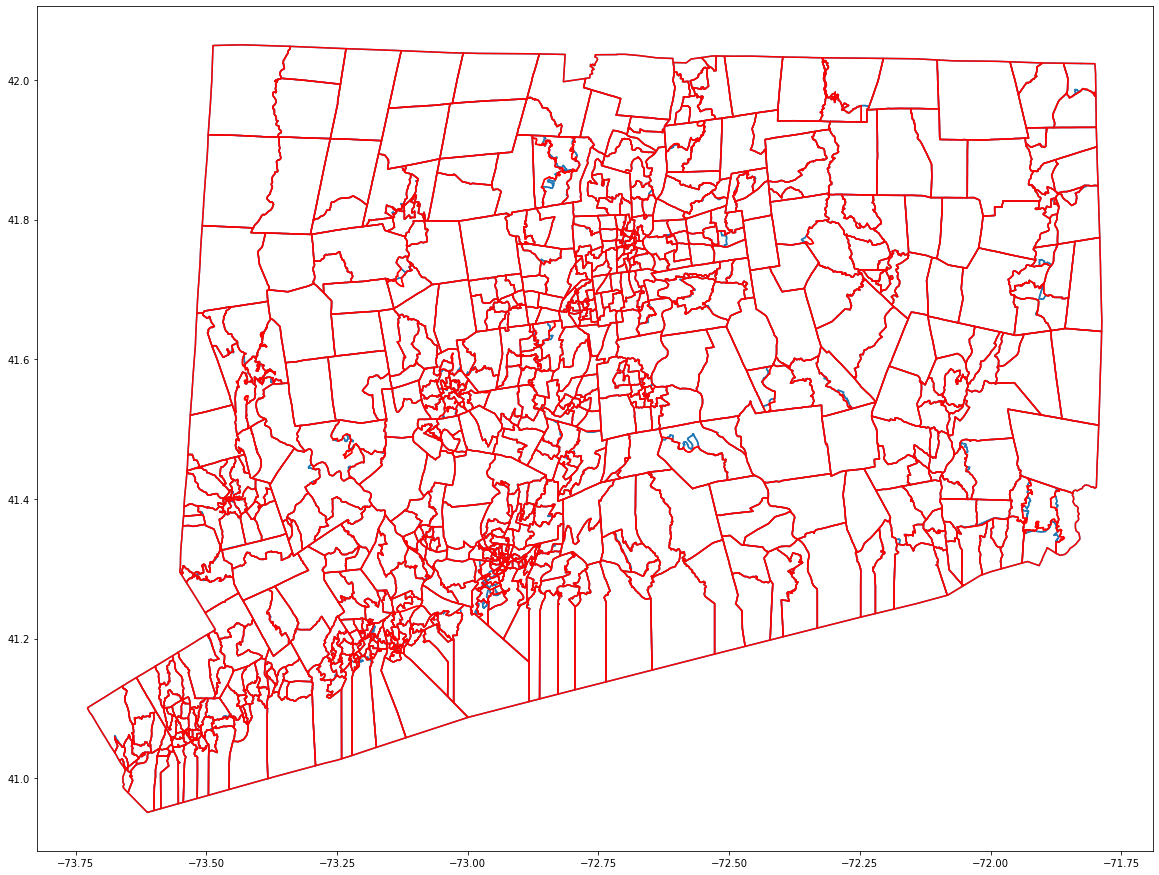

In [23]:
#Take a quick look to see how it compares with VEST's shapes
ax = shapefiles.boundary.plot(figsize=(20,20))
vest_ct_18.boundary.plot(ax=ax,color="red")